In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)


In [2]:
areas = [
    "London", "Manchester", "Birmingham", "Leeds", "Liverpool",
    "Sheffield", "Newcastle", "Glasgow", "Cardiff", "Belfast"
]

n = len(areas)

df = pd.DataFrame({
    "area": areas,

    # --- Financial health & performance (example raw inputs) ---
    "revenue_gbp": rng.integers(800_000, 6_000_000, size=n),              # annual revenue
    "net_profit_gbp": rng.integers(-100_000, 1_200_000, size=n),          # annual net profit (can be negative)
    "operating_cash_flow_gbp": rng.integers(-50_000, 1_500_000, size=n),  # annual operating cash flow
    "current_assets_gbp": rng.integers(200_000, 3_500_000, size=n),
    "current_liabilities_gbp": rng.integers(150_000, 3_000_000, size=n),
    "recurring_revenue_pct": rng.uniform(0.10, 0.85, size=n),             # 0-1

    # --- Customer & market position ---
    "nps": rng.integers(-20, 75, size=n),                                 # -100 to 100 in real life
    "customer_churn_pct": rng.uniform(0.05, 0.40, size=n),                # 0-1 (monthly/annual—be consistent!)
    "brand_reputation_score": rng.uniform(2.0, 9.5, size=n),              # e.g., from reviews/mentions (0-10)
    "market_share_growth_pct": rng.uniform(-0.10, 0.25, size=n),          # -1 to 1 (here -10% to +25%)
    "uvp_clarity_score": rng.uniform(2.0, 10.0, size=n),                  # 0-10

    # --- Operational efficiency & strategy ---
    "strategy_clarity_score": rng.uniform(2.0, 10.0, size=n),             # 0-10
    "process_efficiency_score": rng.uniform(2.0, 10.0, size=n),           # 0-10
    "kpi_usage_score": rng.uniform(1.0, 10.0, size=n),                    # 0-10
    "adaptability_score": rng.uniform(1.0, 10.0, size=n),                 # 0-10

    # --- People & culture ---
    "employee_engagement_score": rng.uniform(2.0, 10.0, size=n),          # 0-10
    "annual_turnover_pct": rng.uniform(0.05, 0.45, size=n),               # 0-1
    "leadership_score": rng.uniform(2.0, 10.0, size=n),                   # 0-10
    "training_hours_per_employee": rng.uniform(2.0, 60.0, size=n)         # annual avg
})

df.head()


,area,revenue_gbp,net_profit_gbp,operating_cash_flow_gbp,current_assets_gbp,current_liabilities_gbp,recurring_revenue_pct,nps,customer_churn_pct,brand_reputation_score,market_share_growth_pct,uvp_clarity_score,strategy_clarity_score,process_efficiency_score,kpi_usage_score,adaptability_score,employee_engagement_score,annual_turnover_pct,leadership_score,training_hours_per_employee
0,London,1264104,584422,725545,1686516,620902,0.245979,55,0.203003,3.499312,0.133941,3.716677,7.314508,3.218497,9.177226,5.101987,6.672784,0.118237,5.893267,49.924932
1,Manchester,4824571,1168309,524736,949887,2310550,0.450041,-3,0.341437,2.055217,0.064884,5.268229,5.251095,7.570563,7.297364,2.821270,7.198773,0.420048,5.925656,53.977325
2,Birmingham,4203771,856478,232951,504048,2146490,0.132853,23,0.295093,7.901933,0.097833,8.827225,8.512163,5.569250,3.392830,3.753610,2.675555,0.282424,9.502612,10.134447
3,Leeds,3082167,889481,1386485,2030129,1160399,0.215717,-8,0.159328,6.986381,0.167750,3.871516,3.335783,5.048170,9.722587,6.212976,5.326459,0.188748,6.573824,34.134096
4,Liverpool,3051679,832720,1161429,3130036,343572,0.612287,45,0.341291,7.288740,0.122151,2.466422,2.181697,4.412097,8.008758,2.590955,2.332913,0.286366,5.787915,8.297393


In [3]:
df = df.copy()

# Profitability & margins
df["net_margin_pct"] = np.where(
    df["revenue_gbp"] > 0,
    df["net_profit_gbp"] / df["revenue_gbp"],
    np.nan
)

# Positive cash flow (simple indicator + ratio)
df["cash_flow_positive"] = (df["operating_cash_flow_gbp"] > 0).astype(int)
df["cash_flow_to_revenue_pct"] = np.where(
    df["revenue_gbp"] > 0,
    df["operating_cash_flow_gbp"] / df["revenue_gbp"],
    np.nan
)

# Strong balance sheet: current ratio
df["current_ratio"] = np.where(
    df["current_liabilities_gbp"] > 0,
    df["current_assets_gbp"] / df["current_liabilities_gbp"],
    np.nan
)

# Make churn & recurring revenue consistent scale (0..1 already in sample)
# NPS already in scale (-100..100) (sample is -20..75)

df[[
    "area",
    "revenue_gbp", "net_profit_gbp", "net_margin_pct",
    "operating_cash_flow_gbp", "cash_flow_to_revenue_pct", "current_ratio",
    "recurring_revenue_pct", "nps", "customer_churn_pct"
]].head()


,area,revenue_gbp,net_profit_gbp,net_margin_pct,operating_cash_flow_gbp,cash_flow_to_revenue_pct,current_ratio,recurring_revenue_pct,nps,customer_churn_pct
0,London,1264104,584422,0.462321,725545,0.573960,2.716235,0.245979,55,0.203003
1,Manchester,4824571,1168309,0.242158,524736,0.108763,0.411109,0.450041,-3,0.341437
2,Birmingham,4203771,856478,0.203740,232951,0.055415,0.234824,0.132853,23,0.295093
3,Leeds,3082167,889481,0.288589,1386485,0.449841,1.749509,0.215717,-8,0.159328
4,Liverpool,3051679,832720,0.272873,1161429,0.380587,9.110277,0.612287,45,0.341291


In [4]:
def minmax_score(series: pd.Series, higher_is_better: bool = True, clip: tuple | None = None) -> pd.Series:
    s = series.astype(float).copy()
    if clip is not None:
        s = s.clip(clip[0], clip[1])
    # If constant or all NaN, return 50s
    if s.dropna().nunique() <= 1:
        return pd.Series(np.full(len(s), 50.0), index=s.index)
    s_min, s_max = np.nanmin(s), np.nanmax(s)
    scaled = (s - s_min) / (s_max - s_min)
    if not higher_is_better:
        scaled = 1 - scaled
    return 100 * scaled

def zscore_to_0_100(series: pd.Series) -> pd.Series:
    """Useful when the natural scale is wide (e.g. profit)."""
    s = series.astype(float)
    mu, sigma = np.nanmean(s), np.nanstd(s)
    if np.isnan(sigma) or sigma == 0:
        return pd.Series(np.full(len(s), 50.0), index=s.index)
    z = (s - mu) / sigma
    # squish z to 0..100 using a logistic-like transform
    return 100 * (1 / (1 + np.exp(-z)))


In [5]:
df_scores = df.copy()

# --- FINANCIAL pillar (0..100) ---
df_scores["score_net_margin"] = minmax_score(df_scores["net_margin_pct"], higher_is_better=True, clip=(-0.20, 0.40))
df_scores["score_cashflow"] = minmax_score(df_scores["cash_flow_to_revenue_pct"], higher_is_better=True, clip=(-0.10, 0.40))
df_scores["score_current_ratio"] = minmax_score(df_scores["current_ratio"], higher_is_better=True, clip=(0.5, 3.0))
df_scores["score_recurring_rev"] = minmax_score(df_scores["recurring_revenue_pct"], higher_is_better=True, clip=(0.0, 1.0))

financial_weights = {
    "score_net_margin": 0.35,
    "score_cashflow": 0.30,
    "score_current_ratio": 0.20,
    "score_recurring_rev": 0.15
}
df_scores["financial_score"] = sum(df_scores[k] * w for k, w in financial_weights.items())

# --- CUSTOMER & MARKET pillar ---
# NPS: higher better (cap typical range -100..100)
df_scores["score_nps"] = minmax_score(df_scores["nps"], higher_is_better=True, clip=(-100, 100))
df_scores["score_churn"] = minmax_score(df_scores["customer_churn_pct"], higher_is_better=False, clip=(0.0, 0.6))
df_scores["score_brand"] = minmax_score(df_scores["brand_reputation_score"], higher_is_better=True, clip=(0.0, 10.0))
df_scores["score_mkt_share_growth"] = minmax_score(df_scores["market_share_growth_pct"], higher_is_better=True, clip=(-0.20, 0.40))
df_scores["score_uvp"] = minmax_score(df_scores["uvp_clarity_score"], higher_is_better=True, clip=(0.0, 10.0))

customer_weights = {
    "score_nps": 0.30,
    "score_churn": 0.25,
    "score_brand": 0.20,
    "score_mkt_share_growth": 0.15,
    "score_uvp": 0.10
}
df_scores["customer_market_score"] = sum(df_scores[k] * w for k, w in customer_weights.items())

# --- OPERATIONS & STRATEGY pillar ---
df_scores["score_strategy"] = minmax_score(df_scores["strategy_clarity_score"], higher_is_better=True, clip=(0.0, 10.0))
df_scores["score_efficiency"] = minmax_score(df_scores["process_efficiency_score"], higher_is_better=True, clip=(0.0, 10.0))
df_scores["score_kpi"] = minmax_score(df_scores["kpi_usage_score"], higher_is_better=True, clip=(0.0, 10.0))
df_scores["score_adaptability"] = minmax_score(df_scores["adaptability_score"], higher_is_better=True, clip=(0.0, 10.0))

ops_weights = {
    "score_strategy": 0.30,
    "score_efficiency": 0.30,
    "score_kpi": 0.20,
    "score_adaptability": 0.20
}
df_scores["ops_strategy_score"] = sum(df_scores[k] * w for k, w in ops_weights.items())

# --- PEOPLE & CULTURE pillar ---
df_scores["score_engagement"] = minmax_score(df_scores["employee_engagement_score"], higher_is_better=True, clip=(0.0, 10.0))
df_scores["score_turnover"] = minmax_score(df_scores["annual_turnover_pct"], higher_is_better=False, clip=(0.0, 0.7))
df_scores["score_leadership"] = minmax_score(df_scores["leadership_score"], higher_is_better=True, clip=(0.0, 10.0))
df_scores["score_training"] = minmax_score(df_scores["training_hours_per_employee"], higher_is_better=True, clip=(0.0, 80.0))

people_weights = {
    "score_engagement": 0.35,
    "score_turnover": 0.25,
    "score_leadership": 0.25,
    "score_training": 0.15
}
df_scores["people_culture_score"] = sum(df_scores[k] * w for k, w in people_weights.items())

# --- OVERALL score (you can tune these pillar weights too) ---
pillar_weights = {
    "financial_score": 0.30,
    "customer_market_score": 0.25,
    "ops_strategy_score": 0.25,
    "people_culture_score": 0.20
}
df_scores["overall_score"] = sum(df_scores[k] * w for k, w in pillar_weights.items())

df_scores[["area", "financial_score", "customer_market_score", "ops_strategy_score", "people_culture_score", "overall_score"]].round(2).sort_values("overall_score", ascending=False)


,area,financial_score,customer_market_score,ops_strategy_score,people_culture_score,overall_score
9,Belfast,73.49,69.45,79.86,67.39,72.85
0,London,85.18,64.20,53.36,78.63,70.67
6,Newcastle,93.08,50.45,61.14,28.33,61.49
3,Leeds,66.66,52.85,47.38,61.37,57.33
5,Sheffield,36.79,50.05,55.39,68.46,51.09
4,Liverpool,82.13,55.49,22.98,22.15,48.69
2,Birmingham,17.16,60.46,49.99,38.15,40.39
8,Cardiff,70.58,34.61,13.81,31.42,39.56
7,Glasgow,28.56,51.50,36.64,42.75,39.15
1,Manchester,32.16,15.78,50.01,63.69,38.84


In [6]:
ranked = (
    df_scores[["area", "overall_score", "financial_score", "customer_market_score", "ops_strategy_score", "people_culture_score"]]
    .sort_values("overall_score", ascending=False)
    .reset_index(drop=True)
)

ranked.index = ranked.index + 1
ranked.round(2)


,area,overall_score,financial_score,customer_market_score,ops_strategy_score,people_culture_score
1,Belfast,72.85,73.49,69.45,79.86,67.39
2,London,70.67,85.18,64.20,53.36,78.63
3,Newcastle,61.49,93.08,50.45,61.14,28.33
4,Leeds,57.33,66.66,52.85,47.38,61.37
5,Sheffield,51.09,36.79,50.05,55.39,68.46
6,Liverpool,48.69,82.13,55.49,22.98,22.15
7,Birmingham,40.39,17.16,60.46,49.99,38.15
8,Cardiff,39.56,70.58,34.61,13.81,31.42
9,Glasgow,39.15,28.56,51.50,36.64,42.75
10,Manchester,38.84,32.16,15.78,50.01,63.69


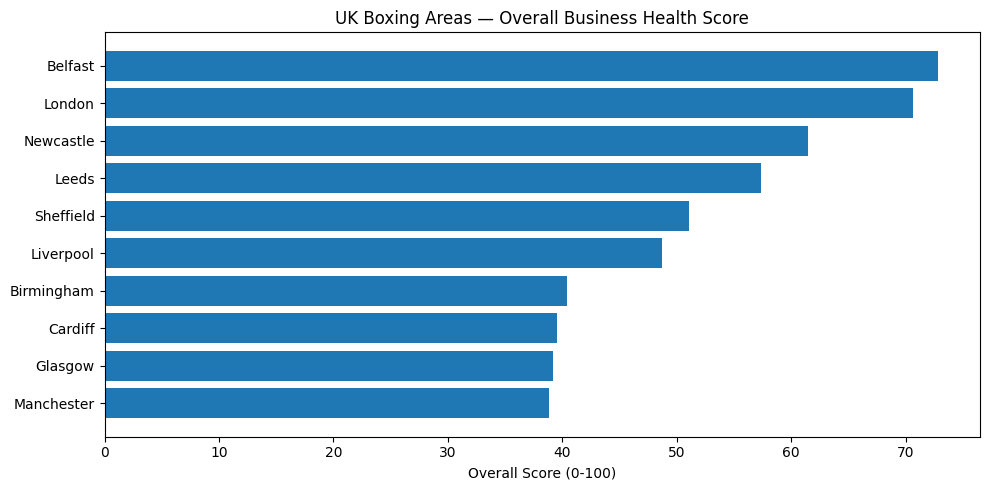

In [7]:
plot_df = ranked.sort_values("overall_score", ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(plot_df["area"], plot_df["overall_score"])
plt.xlabel("Overall Score (0-100)")
plt.title("UK Boxing Areas — Overall Business Health Score")
plt.tight_layout()
plt.show()


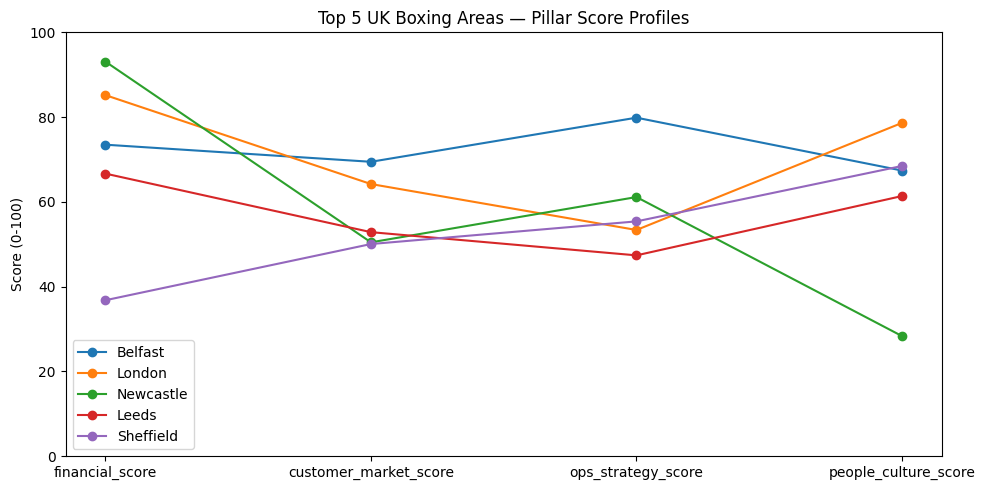

In [8]:
top5 = ranked.head(5).merge(df_scores, on=["area", "overall_score", "financial_score", "customer_market_score", "ops_strategy_score", "people_culture_score"])

pillars = ["financial_score", "customer_market_score", "ops_strategy_score", "people_culture_score"]

plt.figure(figsize=(10, 5))
for _, row in top5.iterrows():
    plt.plot(pillars, [row[p] for p in pillars], marker="o", label=row["area"])

plt.ylim(0, 100)
plt.ylabel("Score (0-100)")
plt.title("Top 5 UK Boxing Areas — Pillar Score Profiles")
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
pillar_cols = ["financial_score", "customer_market_score", "ops_strategy_score", "people_culture_score"]

def lowest_pillar(row):
    vals = row[pillar_cols]
    min_col = vals.idxmin()
    return min_col, vals[min_col]

weakspots = df_scores[["area"] + pillar_cols].copy()
weakspots[["weakest_pillar", "weakest_score"]] = weakspots.apply(
    lambda r: pd.Series(lowest_pillar(r)),
    axis=1
)

weakspots.sort_values("weakest_score").round(2)


,area,financial_score,customer_market_score,ops_strategy_score,people_culture_score,weakest_pillar,weakest_score
8,Cardiff,70.58,34.61,13.81,31.42,ops_strategy_score,13.81
1,Manchester,32.16,15.78,50.01,63.69,customer_market_score,15.78
2,Birmingham,17.16,60.46,49.99,38.15,financial_score,17.16
4,Liverpool,82.13,55.49,22.98,22.15,people_culture_score,22.15
6,Newcastle,93.08,50.45,61.14,28.33,people_culture_score,28.33
7,Glasgow,28.56,51.50,36.64,42.75,financial_score,28.56
5,Sheffield,36.79,50.05,55.39,68.46,financial_score,36.79
3,Leeds,66.66,52.85,47.38,61.37,ops_strategy_score,47.38
0,London,85.18,64.20,53.36,78.63,ops_strategy_score,53.36
9,Belfast,73.49,69.45,79.86,67.39,people_culture_score,67.39


In [10]:
# Example mapping idea:
# df = pd.read_csv("your_real_boxing_area_data.csv")

required_cols = [
    "area",
    "revenue_gbp",
    "net_profit_gbp",
    "operating_cash_flow_gbp",
    "current_assets_gbp",
    "current_liabilities_gbp",
    "recurring_revenue_pct",
    "nps",
    "customer_churn_pct",
    "brand_reputation_score",
    "market_share_growth_pct",
    "uvp_clarity_score",
    "strategy_clarity_score",
    "process_efficiency_score",
    "kpi_usage_score",
    "adaptability_score",
    "employee_engagement_score",
    "annual_turnover_pct",
    "leadership_score",
    "training_hours_per_employee"
]

# Check missing columns:
# missing = [c for c in required_cols if c not in df.columns]
# missing
